In [218]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing  import MinMaxScaler

In [14]:
csv_files = [file for file in os.listdir() if file.endswith('csv')]

In [15]:
df_list = []

for file in csv_files:
    df_list.append(pd.read_csv(file))

In [16]:
csv_files

['crop_rotation.csv',
 'gross_nutrient_balance.csv',
 'irrigation.csv',
 'legal_form.csv',
 'pesticides.csv',
 'precipitation.csv',
 'soil_erosion.csv',
 'temperature.csv',
 'tenure_status.csv',
 'training.csv',
 'yields.csv']

In [5]:
eu27_codes = ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'EL', 'HU', 'IE', 'IT', 'LV', 'LT',
              'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE']

In [6]:
# Let's examine crop_rotation
df_list[0].head()

,Unnamed: 0,crop_rot,tillage,farmtype,unit,geo,Year,value,crop_rot_total,value_total,share
0,0,NAP,ARA,FT16_SO,HA,AT,2010,NaN,TOTAL,265360.0,NaN
1,1,NAP,ARA,FT16_SO,HA,BE,2010,NaN,TOTAL,NaN,NaN
2,2,NAP,ARA,FT16_SO,HA,BG,2010,NaN,TOTAL,204310.0,NaN
3,3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN,TOTAL,278910.0,NaN
4,4,NAP,ARA,FT16_SO,HA,DE,2010,NaN,TOTAL,NaN,NaN


In [7]:
crop_rotation_df = df_list[0]

In [8]:
def rename_filter_drop(df, old_col_name, new_col_name, filter_var, filter_val, cols_to_drop):
    """
    Renames a column in a DataFrame, filters for specific values of another column and drops a list of columns.
    
    Paramters:
    df (pandas DataFrame): The DataFrame to operate on
    old_col_name (str): The column name which is to be changed
    new_col_name (str): The new column name to be used
    filter_var (str): The variable which is to be filtered
    filter_val (list): The values to be filtered for
    cols_to_drop (list): The columns to be dropped
    
    """
    
    df = df.rename(columns = {old_col_name: new_col_name})
    df = df[df[filter_var].isin(filter_val)]
    df = df.drop(columns = cols_to_drop)
    return df

In [55]:
crop_rotation_df = rename_filter_drop(crop_rotation_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, 
                                      ['Unnamed: 0', 'freq', 'agrarea'])

In [56]:
crop_rotation_df.head()

,crop_rot,tillage,farmtype,unit,geo,2010,2016
0,NAP,ARA,FT16_SO,HA,AT,NaN,0.0
10,NAP,ARA,FT16_SO,HA,BE,NaN,0.0
22,NAP,ARA,FT16_SO,HA,BG,NaN,0.0
29,NAP,ARA,FT16_SO,HA,CZ,NaN,0.0
36,NAP,ARA,FT16_SO,HA,DE,NaN,0.0


In [52]:
crop_rotation_df.agrarea.unique()

array(['TOTAL'], dtype=object)

In [59]:
crop_rotation_df_long = crop_rotation_df.melt(id_vars = ['crop_rot', 'tillage', 'farmtype', 'unit', 'geo'], 
                                              value_vars = ['2010', '2016'], var_name = 'Year')

In [60]:
crop_rotation_df_long.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN


In [57]:
# Seen as this doesn't seem to be working, I could filter for the group and then use the tried and tested way
# Actually it seems to be working if you replace the x.size with len(x)

def grouped_null_counts(df, group):
    df = df.groupby(group).apply(lambda x: (x.isnull().sum() / len(x)) * 100)
    return df

In [120]:
# There's only 2010 data for the TOTAL crop_rot but the below doesn't seem to suggest that
# This should be working now although I haven't re-run things as of this comment

null_counts_crop_rot = grouped_null_counts(crop_rotation_df_long, 'crop_rot')
null_counts_geo = grouped_null_counts(crop_rotation_df_long, 'geo')
null_counts_year = grouped_null_counts(crop_rotation_df_long, 'Year')
print(null_counts_crop_rot)
print(null_counts_geo)
print(null_counts_year)

          crop_rot  tillage  farmtype  unit  geo  Year     value
crop_rot                                                        
NAP            0.0      0.0       0.0   0.0  0.0   0.0  0.075000
PC0            0.0      0.0       0.0   0.0  0.0   0.0  0.075000
PC1-24         0.0      0.0       0.0   0.0  0.0   0.0  0.074830
PC25-49        0.0      0.0       0.0   0.0  0.0   0.0  0.077922
PC50-74        0.0      0.0       0.0   0.0  0.0   0.0  0.074675
PC_GE75        0.0      0.0       0.0   0.0  0.0   0.0  0.071429
TOTAL          0.0      0.0       0.0   0.0  0.0   0.0  0.034161
     crop_rot  tillage  farmtype  unit  geo  Year     value
geo                                                        
AT        0.0      0.0       0.0   0.0  0.0   0.0  0.061224
BE        0.0      0.0       0.0   0.0  0.0   0.0  0.071429
BG        0.0      0.0       0.0   0.0  0.0   0.0  0.061224
CY        0.0      0.0       0.0   0.0  0.0   0.0  0.071429
CZ        0.0      0.0       0.0   0.0  0.0   0.0  0.06

In [149]:
crop_rotation_df_long[crop_rotation_df_long.Year == '2010'].value.isnull().sum() / len(crop_rotation_df_long[crop_rotation_df_long.Year == '2010'].value)

0.92

In [79]:
null_values = crop_rotation_df_long[crop_rotation_df_long.value.isnull()]
null_values

,crop_rot,tillage,farmtype,unit,geo,Year,value
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN
...,...,...,...,...,...,...,...
189,PC0,ARA,FT16_SO,HA,SK,2016,NaN
204,PC1-24,ARA,FT16_SO,HA,LU,2016,NaN
225,PC25-49,ARA,FT16_SO,HA,LU,2016,NaN
232,PC25-49,ARA,FT16_SO,HA,SK,2016,NaN


In [61]:
crop_rotation_total = crop_rotation_df_long[crop_rotation_df_long.crop_rot == 'TOTAL']

In [62]:
crop_rotation_total.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value
127,TOTAL,ARA,FT16_SO,HA,AT,2010,265360.0
128,TOTAL,ARA,FT16_SO,HA,BE,2010,NaN
129,TOTAL,ARA,FT16_SO,HA,BG,2010,204310.0
130,TOTAL,ARA,FT16_SO,HA,CY,2010,NaN
131,TOTAL,ARA,FT16_SO,HA,CZ,2010,278910.0


In [82]:
crop_rot_join = pd.merge(crop_rotation_df_long, crop_rotation_total, on = ['tillage', 'farmtype', 'unit', 'geo', 'Year'], 
                         how = 'left', suffixes = ('', '_total'))

In [83]:
crop_rot_join.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value,crop_rot_total,value_total
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN,TOTAL,265360.0
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN,TOTAL,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN,TOTAL,204310.0
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN,TOTAL,278910.0
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN,TOTAL,NaN


In [84]:
crop_rot_join['share'] = crop_rot_join.value/crop_rot_join.value_total * 100

In [90]:
crop_rot_join.head()

,crop_rot,tillage,farmtype,unit,geo,Year,value,crop_rot_total,value_total,share
0,NAP,ARA,FT16_SO,HA,AT,2010,NaN,TOTAL,265360.0,NaN
1,NAP,ARA,FT16_SO,HA,BE,2010,NaN,TOTAL,NaN,NaN
2,NAP,ARA,FT16_SO,HA,BG,2010,NaN,TOTAL,204310.0,NaN
3,NAP,ARA,FT16_SO,HA,CZ,2010,NaN,TOTAL,278910.0,NaN
4,NAP,ARA,FT16_SO,HA,DE,2010,NaN,TOTAL,NaN,NaN


In [102]:
crop_rot_join_graph = crop_rot_join[crop_rot_join.crop_rot != 'TOTAL']

In [104]:
crop_rot_join_graph.crop_rot.unique()

array(['NAP', 'PC0', 'PC1-24', 'PC25-49', 'PC50-74', 'PC_GE75'],
      dtype=object)

C:\Users\justi\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


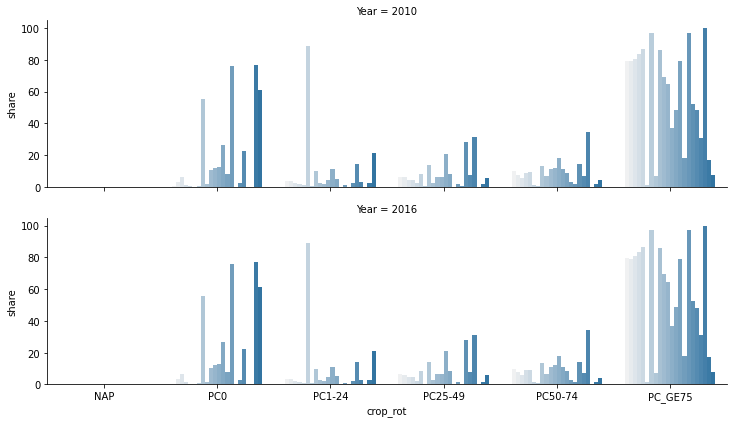

In [106]:

crop_rot_join_graph = crop_rot_join[crop_rot_join.crop_rot != 'TOTAL']

g = sns.FacetGrid(crop_rot_join_graph, row = 'Year')

g.map(sns.barplot, x = crop_rot_join_graph.crop_rot, y = crop_rot_join_graph.share, hue = crop_rot_join_graph.geo)

g.fig.set_size_inches(14, 6)

plt.show()

In [122]:
#crop_rot_join_graph_2010.to_csv('check.csv')
#crop_rot_join_graph.to_csv('check2.csv')
crop_rotation_df_long.to_csv('check3.csv')

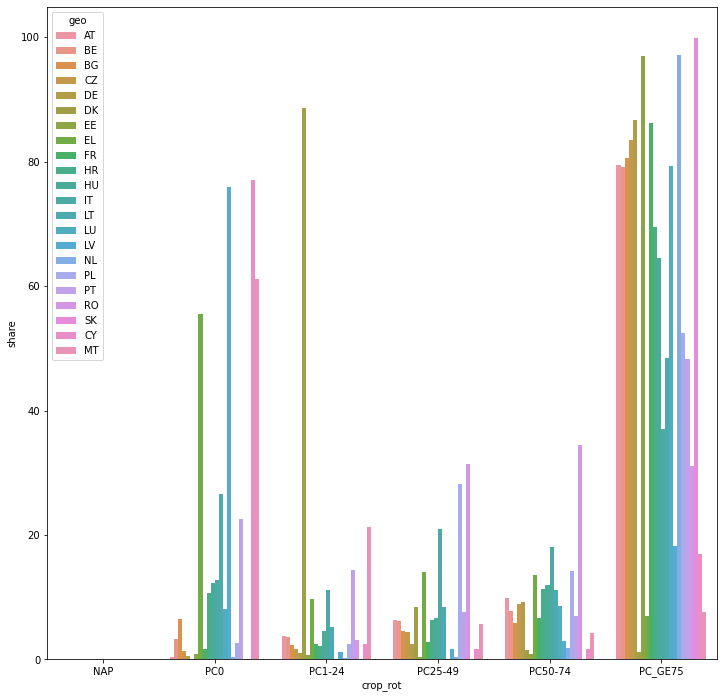

In [131]:
# The data appears to be almost identical between the two years, let's take a closer look by only considering 2010
# Correction there isn't really any data for 2010, not sure why we get the above graph

crop_rot_join_graph_2016 = crop_rot_join_graph[crop_rot_join_graph.Year == '2016']

fig, ax = plt.subplots(figsize = (12, 12))

sns.barplot(data = crop_rot_join_graph_2016, x = crop_rot_join_graph_2016.crop_rot, y = crop_rot_join_graph_2016.share,
           hue = crop_rot_join_graph_2016.geo, ax = ax)



plt.show()

In [12]:
def categorical_converter(x):
    if x < 20:
        return 'very low'
    elif 20 <= x < 40:
        return 'low'
    elif 40 <= x < 60:
        return 'medium'
    elif 60 <= x < 80:
        return 'high'
    else:
        return 'very high'

In [10]:
# From the graph above, there are only 0 values for NAP so let's remove them
# I also want to pivot by crop rotation
# from visual inspection of the data, values of NaN are actually 0 values
# I know this because I've calcualated shares and the values add up 100% if I replace NaN with 0
# As I only have values for 1 year, I want to treat this data as a categorical variable rather than numerical
# I adjust for that below



crop_rot_clean = crop_rot_join_graph_2016[crop_rot_join_graph_2016.crop_rot != 'NAP'] \
                    .pivot(index = ['tillage', 'farmtype', 'unit', 'geo'], columns = 'crop_rot', values = 'share') \
                    .reset_index() \
                    .fillna(0)

for col in crop_rot_clean.select_dtypes(include = ['int', 'float']).columns:
    crop_rot_clean[col] = crop_rot_clean[col].apply(categorical_converter)



NameError: name 'crop_rot_join_graph_2016' is not defined

In [150]:
crop_rot_clean.head()

crop_rot,tillage,farmtype,unit,geo,PC0,PC1-24,PC25-49,PC50-74,PC_GE75
0,ARA,FT16_SO,HA,AT,very low,very low,very low,very low,high
1,ARA,FT16_SO,HA,BE,very low,very low,very low,very low,high
2,ARA,FT16_SO,HA,BG,very low,very low,very low,very low,very high
3,ARA,FT16_SO,HA,CY,high,very low,very low,very low,very low
4,ARA,FT16_SO,HA,CZ,very low,very low,very low,very low,very high


In [151]:
# Moving onto gross nutrient balance

df_list[1].head()

,Unnamed: 0,freq,nutrient,indic_ag,geo\TIME_PERIOD,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,A,N,BAL,AT,178458.0,166581.0,154038.0,154390.0,146568.0,...,101664.7,101889.6,95485.9,125087.3,80686.1,121257.8,77552.8,118011.2,121734.8,90473.8
1,1,A,N,BAL,BE,NaN,NaN,NaN,NaN,NaN,...,192787.6,191515.9,190844.7,184567.8,175550.1,175550.0,NaN,NaN,NaN,NaN
2,2,A,N,BAL,BG,NaN,NaN,NaN,742514.0,608229.0,...,71741.0,60296.9,123980.7,78959.4,137486.8,137487.0,357189.5,331185.0,310857.8,144975.2
3,3,A,N,BAL,CH,NaN,NaN,NaN,NaN,NaN,...,104784.8,89503.5,91809.3,104265.8,98547.5,104978.9,105642.2,92871.2,101459.8,89579.8
4,4,A,N,BAL,CY,NaN,NaN,NaN,NaN,NaN,...,21975.8,23027.4,21384.0,19127.3,20792.7,20793.0,NaN,NaN,NaN,NaN


In [153]:
nut_bal_df = df_list[1]

In [156]:
nut_bal_df.columns

Index(['Unnamed: 0', 'freq', 'nutrient', 'indic_ag', 'geo\TIME_PERIOD', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [157]:
nut_bal_df = rename_filter_drop(nut_bal_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [159]:
nut_bal_df_long = nut_bal_df.melt(id_vars = ['nutrient', 'indic_ag', 'geo'], var_name = 'Year')

In [160]:
nut_bal_df_long.head()

,nutrient,indic_ag,geo,Year,value
0,N,BAL,AT,1985,178458.0
1,N,BAL,BE,1985,NaN
2,N,BAL,BG,1985,NaN
3,N,BAL,CY,1985,NaN
4,N,BAL,CZ,1985,454385.0


In [13]:
def null_share(df):
    df = df.isnull().sum() / len(df) * 100
    return df
    

In [164]:
null_share(nut_bal_df_long)

nutrient     0.000000
indic_ag     0.000000
geo          0.000000
Year         0.000000
value       24.032578
dtype: float64

In [191]:
grouped_null_counts(nut_bal_df_long, 'Year')

,nutrient,indic_ag,geo,Year,value
Year,,,,,
1985,0.0,0.0,0.0,0.0,0.166821
1986,0.0,0.0,0.0,0.0,0.166821
1987,0.0,0.0,0.0,0.0,0.166821
1988,0.0,0.0,0.0,0.0,0.159836
1989,0.0,0.0,0.0,0.0,0.159836
1990,0.0,0.0,0.0,0.0,0.053621
1991,0.0,0.0,0.0,0.0,0.049512
1992,0.0,0.0,0.0,0.0,0.045917
1993,0.0,0.0,0.0,0.0,0.045917


,nutrient,indic_ag,geo,Year,value
nutrient,,,,,
N,0.0,0.0,0.0,0.0,0.0
P,0.0,0.0,0.0,0.0,0.0


In [ ]:
# A lot of values from the 80s are null but these are no use to me anyway since the fertility data doesn't go back that far
# I'll remove these
# There are very few other missing values so I'll simply fill these with 'ffill' seen as there are some missing values in 2019
# So 'bfill' might not produce a value for the 2019 values

In [192]:
nut_bal_df_long = nut_bal_df_long[nut_bal_df_long.Year >= '1990'].fillna(method = 'ffill')

In [193]:
null_share(nut_bal_df_long)

nutrient    0.0
indic_ag    0.0
geo         0.0
Year        0.0
value       0.0
dtype: float64

In [196]:
nut_bal_group = nut_bal_df_long.groupby(['nutrient', 'indic_ag', 'geo']).mean().reset_index()

In [197]:
nut_bal_group.head()

,nutrient,indic_ag,geo,value
0,N,BAL,AT,128322.850000
1,N,BAL,BE,234462.466667
2,N,BAL,BG,194518.560000
3,N,BAL,CY,60074.126667
4,N,BAL,CZ,273372.450000


In [219]:
nut_bal_group_graph = nut_bal_group[nut_bal_group.indic_ag.isin(['BAL_UAA', 'INP_UAA', 'OUT_UAA'])]

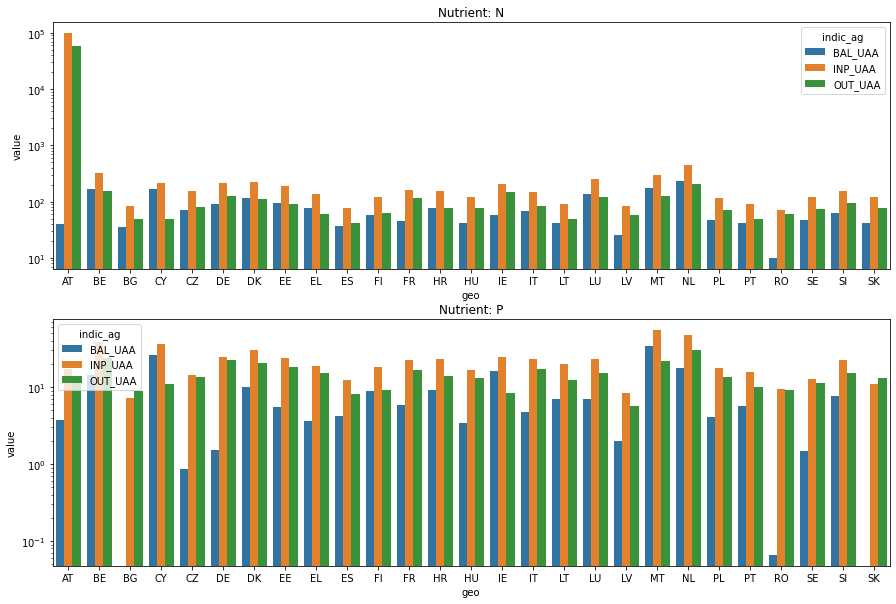

In [227]:
f, ax = plt.subplots(2, 1, figsize = (15, 10))

for i, nutrient in enumerate(nut_bal_group_graph.nutrient.unique()):
    
    nut_bal_graph = nut_bal_group_graph[nut_bal_group_graph['nutrient'] == nutrient]
    
    sns.barplot(x = 'geo', y = 'value', hue = 'indic_ag', data = nut_bal_graph, ax = ax[i])
    
    ax[i].set_yscale('log')
    ax[i].set_title(f'Nutrient: {nutrient}')


In [228]:
nut_bal_group_graph.head()

,nutrient,indic_ag,geo,value
81,N,BAL_UAA,AT,40.273333
82,N,BAL_UAA,BE,165.840000
83,N,BAL_UAA,BG,35.066667
84,N,BAL_UAA,CY,171.020000
85,N,BAL_UAA,CZ,72.013333


In [242]:
nut_bal_N = nut_bal_group_graph[nut_bal_group_graph.nutrient == 'N'] \
                        .pivot(index = ['nutrient', 'geo'], columns = 'indic_ag', values = 'value').reset_index()

In [246]:
nut_bal_P = nut_bal_group_graph[nut_bal_group_graph.nutrient == 'P'] \
                        .pivot(index = ['nutrient', 'geo'], columns = 'indic_ag', values = 'value').reset_index()

In [250]:
len(nut_bal_P)

27

In [261]:
nut_bal_clean = pd.merge(nut_bal_N, nut_bal_P, on = 'geo', how = 'inner', suffixes = ('_N', '_P')) \
                  .drop(columns = ['nutrient_N', 'nutrient_P'])

In [262]:
nut_bal_clean.head()

indic_ag,geo,BAL_UAA_N,INP_UAA_N,OUT_UAA_N,BAL_UAA_P,INP_UAA_P,OUT_UAA_P
0,AT,40.273333,97407.473333,58466.133333,3.743333,17.276667,13.610000
1,BE,165.840000,318.633333,155.680000,14.513333,38.543333,24.253333
2,BG,35.066667,83.843333,48.226667,-2.056667,7.163333,9.036667
3,CY,171.020000,214.896667,48.860000,25.910000,35.863333,11.070000
4,CZ,72.013333,153.620000,81.606667,0.856667,14.336667,13.526667


In [ ]:
# Moving onto irrigation

In [264]:
irrigation_df = df_list[2]

In [265]:
irrigation_df.head()

,Unnamed: 0,freq,irr_area,so_eur,agrarea,unit,geo\TIME_PERIOD,2013,2016
0,63720,A,UAAIB,TOTAL,TOTAL,HA,AT,119840.0,99750.0
1,63721,A,UAAIB,TOTAL,TOTAL,HA,AT11,26640.0,22610.0
2,63722,A,UAAIB,TOTAL,TOTAL,HA,AT12,80760.0,63570.0
3,63723,A,UAAIB,TOTAL,TOTAL,HA,AT13,2210.0,2180.0
4,63724,A,UAAIB,TOTAL,TOTAL,HA,AT21,1250.0,1350.0


In [267]:
irrigation_df = rename_filter_drop(irrigation_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [268]:
irrigation_df.head()

,irr_area,so_eur,agrarea,unit,geo,2013,2016
0,UAAIB,TOTAL,TOTAL,HA,AT,119840.0,99750.0
10,UAAIB,TOTAL,TOTAL,HA,BE,19180.0,24110.0
22,UAAIB,TOTAL,TOTAL,HA,BG,115520.0,136350.0
29,UAAIB,TOTAL,TOTAL,HA,CY,38060.0,38140.0
31,UAAIB,TOTAL,TOTAL,HA,CZ,34070.0,45850.0


In [275]:
irrigation_df_long = irrigation_df.melt(id_vars = ['irr_area', 'geo'], var_name = 'Year', value_vars = ['2013', '2016'])

In [276]:
irrigation_df_long.head()

,irr_area,geo,Year,value
0,UAAIB,AT,2013,119840.0
1,UAAIB,BE,2013,19180.0
2,UAAIB,BG,2013,115520.0
3,UAAIB,CY,2013,38060.0
4,UAAIB,CZ,2013,34070.0


In [278]:
null_share(irrigation_df_long)

irr_area    0.000000
geo         0.000000
Year        0.000000
value       1.851852
dtype: float64

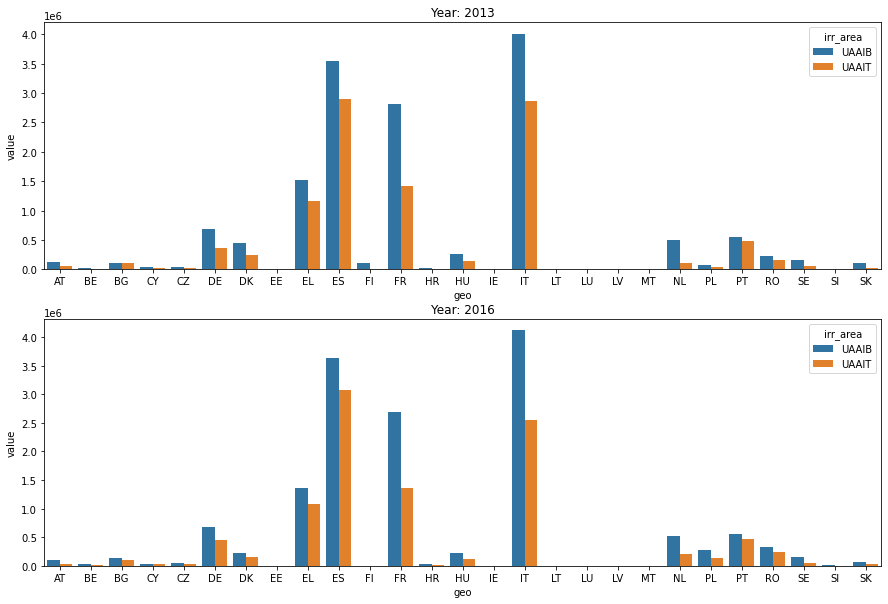

In [287]:
f, ax = plt.subplots(2, 1, figsize = (15, 10))

for i, year in enumerate(irrigation_df_long.Year.unique()):
    
    irrigation_graph = irrigation_df_long[irrigation_df_long['Year'] == year]
    
    sns.barplot(x = 'geo', y = 'value', hue = 'irr_area', data = irrigation_graph, ax = ax[i])
    
    #ax[i].set_yscale('log')
    ax[i].set_title(f'Year: {year}')

In [288]:
irrigation_df_long.head()

,irr_area,geo,Year,value
0,UAAIB,AT,2013,119840.0
1,UAAIB,BE,2013,19180.0
2,UAAIB,BG,2013,115520.0
3,UAAIB,CY,2013,38060.0
4,UAAIB,CZ,2013,34070.0


In [289]:
irrigation_potential = irrigation_df_long[irrigation_df_long.irr_area == 'UAAIB']

In [347]:
irrigation_join = pd.merge(irrigation_df_long, irrigation_potential, on = ['geo', 'Year'], how = 'left', 
                            suffixes = ('_act', '_pot'))

In [348]:
irrigation_join['share'] = irrigation_join.value_act.div(irrigation_join.value_pot).mul(100)


In [349]:
irrigation_join = irrigation_join[irrigation_join['irr_area_act'] == 'UAAIT']

In [350]:
irrigation_join.head()

,irr_area_act,geo,Year,value_act,irr_area_pot,value_pot,share
27,UAAIT,AT,2013,51680.0,UAAIB,119840.0,43.124166
28,UAAIT,BE,2013,5740.0,UAAIB,19180.0,29.927007
29,UAAIT,BG,2013,98670.0,UAAIB,115520.0,85.413781
30,UAAIT,CY,2013,24670.0,UAAIB,38060.0,64.818707
31,UAAIT,CZ,2013,17840.0,UAAIB,34070.0,52.362783


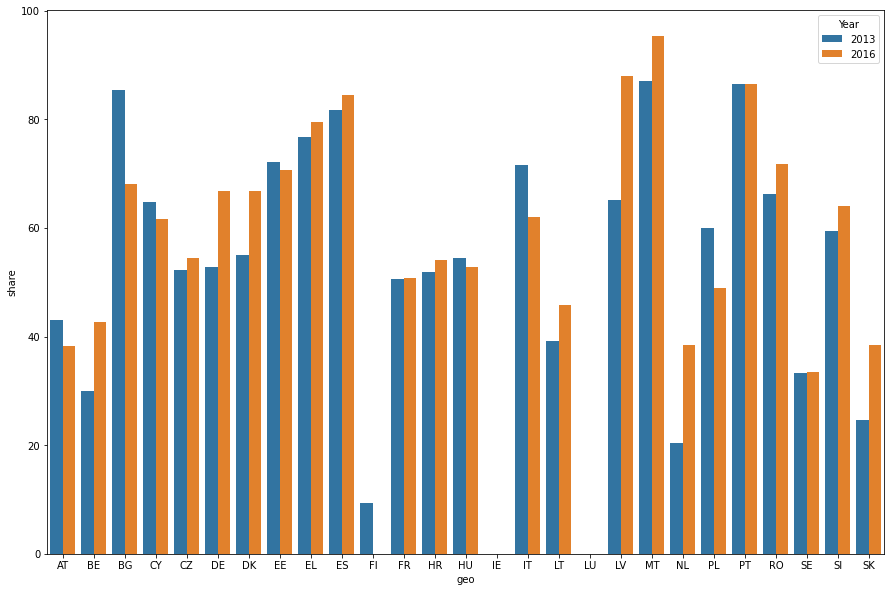

In [351]:
f, ax = plt.subplots(figsize = (15, 10))

sns.barplot(data = irrigation_join, x = 'geo', y = 'share', hue = 'Year', ax = ax)

plt.show()

In [352]:
# As the values are quite similar (statistical test?) and because I've only 2 datapoints, I'm going to average the two
# and convert to categorical data

In [353]:
irrigation_join.head()

,irr_area_act,geo,Year,value_act,irr_area_pot,value_pot,share
27,UAAIT,AT,2013,51680.0,UAAIB,119840.0,43.124166
28,UAAIT,BE,2013,5740.0,UAAIB,19180.0,29.927007
29,UAAIT,BG,2013,98670.0,UAAIB,115520.0,85.413781
30,UAAIT,CY,2013,24670.0,UAAIB,38060.0,64.818707
31,UAAIT,CZ,2013,17840.0,UAAIB,34070.0,52.362783


In [354]:
irrigation_join_mean = irrigation_join.groupby('geo').mean().reset_index().drop(columns = ['value_act', 'value_pot'])

In [355]:
irrigation_join_mean.head()

,geo,share
0,AT,40.704940
1,BE,36.282458
2,BG,76.773631
3,CY,63.203795
4,CZ,53.433300


In [356]:
irrigation_join_mean['irrigation'] = irrigation_join_mean.share.apply(categorical_converter)

In [358]:
irrigation_join_mean.head()

,geo,share,irrigation
0,AT,40.704940,medium
1,BE,36.282458,low
2,BG,76.773631,high
3,CY,63.203795,high
4,CZ,53.433300,medium


In [359]:
# Moving onto legal form

In [382]:
legal_form_df = df_list[3]

In [383]:
legal_form_df.head()

,Unnamed: 0,freq,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo\TIME_PERIOD,2016,2020
0,8350045,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT,NaN,430.0
1,8350046,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT11,NaN,70.0
2,8350047,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT12,NaN,170.0
3,8350048,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT21,NaN,NaN
4,8350049,A,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT22,NaN,NaN


In [384]:
legal_form_df = rename_filter_drop(legal_form_df, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [385]:
legal_form_df.head()

,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo,2016,2020
0,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,AT,NaN,430.0
9,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,BG,NaN,NaN
11,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,DK,NaN,NaN
14,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,ES,NaN,220.0
22,TOTAL,ARA,FT16_SO,HLD_GRP,HA10-19,TOTAL,HA,FI,NaN,6400.0


In [386]:
legal_form_df = legal_form_df[legal_form_df.agrarea == 'TOTAL']

In [387]:
null_share(legal_form_df)

cons_prd     0.000
crops        0.000
farmtype     0.000
leg_form     0.000
agrarea      0.000
so_eur       0.000
unit         0.000
geo          0.000
2016        71.875
2020         3.125
dtype: float64

In [388]:
# There are a huge number of missing values in 2016 so I will drop it and just use 2020
# unless 2016 happens to have a value while 2020 is null, in which case I'll take the 2016 value

In [389]:
legal_form_df['value'] = np.where(legal_form_df['2020'].isnull(), legal_form_df['2016'], legal_form_df['2020'])

In [391]:
# There are slightly fewer missing values in the new 'value' column so it now a mix of 2016 and 2020 data
# I think this is fine for categorical data like legal structure which wouldn't change very much over short periods of time

null_share(legal_form_df)

cons_prd     0.000000
crops        0.000000
farmtype     0.000000
leg_form     0.000000
agrarea      0.000000
so_eur       0.000000
unit         0.000000
geo          0.000000
2016        71.875000
2020         3.125000
value        2.083333
dtype: float64

In [393]:
legal_form_df.head()

,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo,2016,2020,value
442,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,AT,NaN,11850.0,11850.0
452,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,BG,NaN,NaN,NaN
461,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,DK,NaN,26960.0,26960.0
467,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,ES,NaN,3990.0,3990.0
481,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,FI,NaN,47250.0,47250.0


In [397]:
legal_form_total = legal_form_df[legal_form_df.leg_form == 'TOTAL']

In [401]:
legal_form_join = pd.merge(legal_form_df, legal_form_total, 
                           on = ['cons_prd', 'crops', 'farmtype', 'agrarea', 'so_eur', 'unit', 'geo'],
                           how = 'left', suffixes = ['', '_total'])

In [402]:
legal_form_join.head()

,cons_prd,crops,farmtype,leg_form,agrarea,so_eur,unit,geo,2016,2020,value,leg_form_total,2016_total,2020_total,value_total
0,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,AT,NaN,11850.0,11850.0,TOTAL,227770.0,227490.0,227490.0
1,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,BG,NaN,NaN,NaN,TOTAL,124950.0,241520.0,241520.0
2,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,DK,NaN,26960.0,26960.0,TOTAL,320230.0,543830.0,543830.0
3,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,ES,NaN,3990.0,3990.0,TOTAL,937310.0,1305930.0,1305930.0
4,TOTAL,ARA,FT16_SO,HLD_GRP,TOTAL,TOTAL,HA,FI,NaN,47250.0,47250.0,TOTAL,320740.0,506480.0,506480.0


In [403]:
legal_form_join['share'] = legal_form_join.value.div(legal_form_join.value_total).mul(100)

In [405]:
legal_form_join = legal_form_join[['leg_form', 'geo', 'share']]

In [409]:
legal_form_join = legal_form_join[legal_form_join.leg_form != 'TOTAL']

In [410]:
legal_form_join.head()

,leg_form,geo,share
0,HLD_GRP,AT,5.209020
1,HLD_GRP,BG,NaN
2,HLD_GRP,DK,4.957432
3,HLD_GRP,ES,0.305529
4,HLD_GRP,FI,9.329095


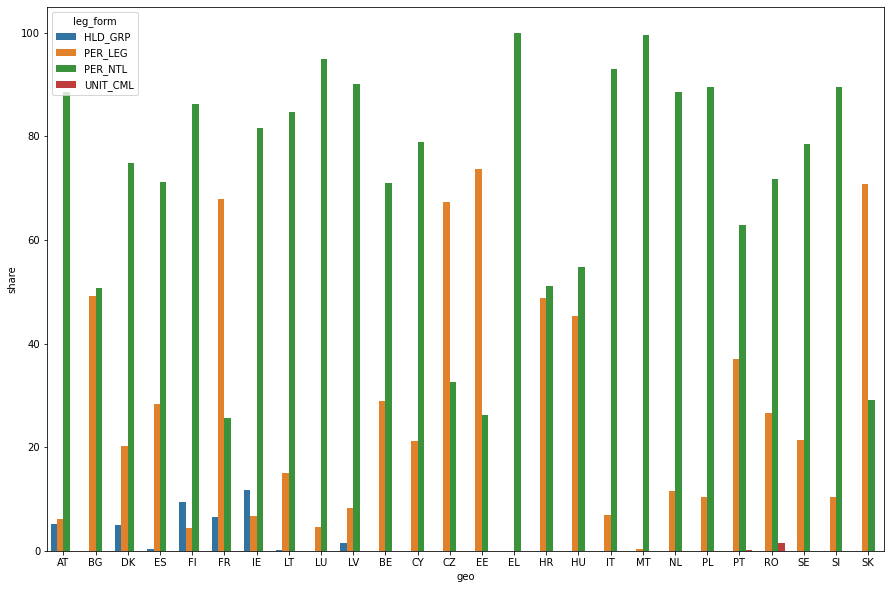

In [415]:
f, ax = plt.subplots(figsize = (15, 10))

sns.barplot(data = legal_form_join, x = 'geo', y = 'share', hue = 'leg_form')

plt.show()

In [416]:
# As these are share which add up to 100%, the NaN values are actuall zeroes so I'll replace them below

In [417]:
legal_form_join.fillna(0, inplace = True)

In [419]:
legal_form_join.head()

,leg_form,geo,share
0,HLD_GRP,AT,5.209020
1,HLD_GRP,BG,0.000000
2,HLD_GRP,DK,4.957432
3,HLD_GRP,ES,0.305529
4,HLD_GRP,FI,9.329095


In [420]:
legal_form_join['legal_form'] = legal_form_join.share.apply(categorical_converter)

In [424]:
legal_form_clean = legal_form_join.pivot(index = 'geo', columns = 'leg_form', values = 'legal_form').reset_index()

In [425]:
legal_form_clean.head()

leg_form,geo,HLD_GRP,PER_LEG,PER_NTL,UNIT_CML
0,AT,very low,very low,very high,NaN
1,BE,NaN,low,high,NaN
2,BG,very low,medium,medium,NaN
3,CY,NaN,low,high,NaN
4,CZ,NaN,high,low,NaN


In [17]:
# Moving onto pesticides

In [18]:
pesticides = df_list[4]

In [19]:
pesticides.head()

,Unnamed: 0,freq,crops,pesticid,unit,geo\TIME_PERIOD,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,27351,A,R1000,F,HA,CY,NaN,4277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2838.0,NaN
1,27352,A,R1000,F,HA,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351583.0,NaN,NaN,NaN
2,27353,A,R1000,F,HA,EL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27354,A,R1000,F,HA,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172381.0,NaN,NaN,NaN
4,27355,A,R1000,F,HA,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9387.0,NaN


In [31]:
pesticides_df = rename_filter_drop(pesticides, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [32]:
pesticides_df.head()

,crops,pesticid,unit,geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,R1000,F,HA,CY,NaN,4277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2838.0,NaN
1,R1000,F,HA,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351583.0,NaN,NaN,NaN
2,R1000,F,HA,EL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R1000,F,HA,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172381.0,NaN,NaN,NaN
4,R1000,F,HA,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9387.0,NaN


In [33]:
pesticides_df.pesticid.unique()

array(['F', 'F01', 'F01_01', 'F01_02', 'F02', 'F02_02', 'F02_03', 'F03',
       'F03_01', 'F03_99', 'F04', 'F04_01', 'F04_02', 'F04_99', 'F05',
       'F05_01', 'F05_99', 'F99', 'F99_01', 'F99_02', 'F99_03', 'F99_05',
       'F99_06', 'F99_07', 'F99_08', 'F99_09', 'F99_10', 'F99_11',
       'F99_12', 'F99_13', 'F99_14', 'F99_15', 'F99_16', 'F99_17',
       'F99_99', 'H', 'H01', 'H01_01', 'H02', 'H02_02', 'H02_03', 'H03',
       'H03_01', 'H03_02', 'H03_03', 'H03_99', 'H04', 'H04_01', 'H05',
       'H05_01', 'H05_99', 'H06', 'H06_01', 'H06_02', 'H06_03', 'H06_99',
       'H99', 'H99_01', 'H99_02', 'H99_03', 'H99_04', 'H99_05', 'H99_07',
       'H99_08', 'H99_09', 'H99_11', 'H99_13', 'H99_14', 'H99_15',
       'H99_18', 'H99_19', 'H99_21', 'H99_22', 'H99_23', 'H99_24',
       'H99_25', 'H99_26', 'H99_99', 'I', 'I01', 'I01_01', 'I03',
       'I03_01', 'I03_02', 'I03_99', 'I04', 'I04_01', 'I04_99', 'I06',
       'I06_02', 'I99', 'I99_01', 'I99_03', 'I99_04', 'I99_05', 'I99_06',
       'I99

In [34]:
# Let's work with more aggregate data and filter for just the letter codes

pesticides_df = pesticides_df[pesticides_df.pesticid.str.isalpha()]

In [35]:
pesticides_df.head()

,crops,pesticid,unit,geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,R1000,F,HA,CY,NaN,4277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2838.0,NaN
1,R1000,F,HA,DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351583.0,NaN,NaN,NaN
2,R1000,F,HA,EL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R1000,F,HA,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172381.0,NaN,NaN,NaN
4,R1000,F,HA,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9387.0,NaN


In [36]:
null_share(pesticides_df)

crops         0.000000
pesticid      0.000000
unit          0.000000
geo           0.000000
2010        100.000000
2011         93.478261
2012        100.000000
2013        100.000000
2014        100.000000
2015        100.000000
2016        100.000000
2017         56.521739
2018         67.391304
2019         69.565217
2020        100.000000
dtype: float64

In [58]:
# The null values seem to be very evenly spread across the different pesticides

grouped_null_counts(pesticides_df, 'pesticid')

,crops,pesticid,unit,geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
pesticid,,,,,,,,,,,,,,,
F,0.0,0.0,0.0,0.0,100.0,90.0,100.0,100.0,100.0,100.0,100.0,60.000000,70.000000,70.000000,100.0
H,0.0,0.0,0.0,0.0,100.0,90.0,100.0,100.0,100.0,100.0,100.0,60.000000,70.000000,60.000000,100.0
I,0.0,0.0,0.0,0.0,100.0,90.0,100.0,100.0,100.0,100.0,100.0,60.000000,70.000000,70.000000,100.0
M,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.000000,50.000000,75.000000,100.0
PGR,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,40.000000,60.000000,80.000000,100.0
ZR,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,57.142857,71.428571,71.428571,100.0


In [59]:
# Only a handful of countries have any data at all, I might have to ignore this as an explanatory variable
grouped_null_counts(pesticides_df, 'geo')

,crops,pesticid,unit,geo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
geo,,,,,,,,,,,,,,,
CY,0.0,0.0,0.0,0.0,100.0,25.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0
DK,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0
EL,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0
FR,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0
HR,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0
IT,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,100.0
LU,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0
PL,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0
PT,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0


In [66]:
# Moving onto precipitation

In [67]:
precipitation = df_list[5]

In [68]:
precipitation.head()

,Unnamed: 0,Austria,Belgium,Bulgaria,Cyprus,Czech Republic,Germany,Denmark,Spain,Estonia,...,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Sweden,Year
0,0,1052.84,702.00,745.45,282.61,644.96,679.26,623.28,699.90,465.81,...,544.84,532.05,703.74,593.49,861.43,746.83,776.19,1610.11,450.41,1901
1,1,1061.55,747.48,604.44,517.09,644.66,670.15,571.07,695.13,681.50,...,679.59,517.00,653.14,602.83,982.67,646.03,854.51,1414.19,531.58,1902
2,2,1201.34,900.16,552.47,408.41,767.25,714.35,751.23,587.65,701.85,...,734.96,357.54,847.83,654.05,857.42,545.30,891.52,1635.81,611.55,1903
3,3,1146.14,679.13,524.68,586.08,612.23,627.67,596.59,614.72,638.50,...,661.88,589.99,610.09,531.73,794.80,533.82,701.77,1531.75,521.95,1904
4,4,1127.85,857.02,614.19,513.32,653.02,724.76,678.88,559.53,600.57,...,654.59,500.78,752.95,648.97,713.31,621.53,799.35,1638.73,534.39,1905


In [69]:
eu_countries = {
    'Austria': 'AT',
    'Belgium': 'BE',
    'Bulgaria': 'BG',
    'Croatia': 'HR',
    'Cyprus': 'CY',
    'Czech Republic': 'CZ',
    'Denmark': 'DK',
    'Estonia': 'EE',
    'Finland': 'FI',
    'France': 'FR',
    'Germany': 'DE',
    'Greece': 'GR',
    'Hungary': 'HU',
    'Ireland': 'IE',
    'Italy': 'IT',
    'Latvia': 'LV',
    'Lithuania': 'LT',
    'Luxembourg': 'LU',
    'Malta': 'MT',
    'Netherlands': 'NL',
    'Poland': 'PL',
    'Portugal': 'PT',
    'Romania': 'RO',
    'Slovakia': 'SK',
    'Slovenia': 'SI',
    'Spain': 'ES',
    'Sweden': 'SE',
}


In [78]:
precipitation.rename(columns = eu_countries, inplace = True)

In [80]:
precipitation.head()

,Unnamed: 0,AT,BE,BG,CY,CZ,DE,DK,ES,EE,...,LV,MT,NL,PL,PT,RO,SK,SI,SE,Year
0,0,1052.84,702.00,745.45,282.61,644.96,679.26,623.28,699.90,465.81,...,544.84,532.05,703.74,593.49,861.43,746.83,776.19,1610.11,450.41,1901
1,1,1061.55,747.48,604.44,517.09,644.66,670.15,571.07,695.13,681.50,...,679.59,517.00,653.14,602.83,982.67,646.03,854.51,1414.19,531.58,1902
2,2,1201.34,900.16,552.47,408.41,767.25,714.35,751.23,587.65,701.85,...,734.96,357.54,847.83,654.05,857.42,545.30,891.52,1635.81,611.55,1903
3,3,1146.14,679.13,524.68,586.08,612.23,627.67,596.59,614.72,638.50,...,661.88,589.99,610.09,531.73,794.80,533.82,701.77,1531.75,521.95,1904
4,4,1127.85,857.02,614.19,513.32,653.02,724.76,678.88,559.53,600.57,...,654.59,500.78,752.95,648.97,713.31,621.53,799.35,1638.73,534.39,1905


In [81]:
precipitation_df_long = precipitation.drop(columns = 'Unnamed: 0').melt(id_vars = 'Year', var_name = 'geo')

In [82]:
precipitation_df_long.head()

,Year,geo,value
0,1901,AT,1052.84
1,1902,AT,1061.55
2,1903,AT,1201.34
3,1904,AT,1146.14
4,1905,AT,1127.85


In [98]:
precipitation_df_long.tail()

,Year,geo,value
3262,2017,SE,678.22
3263,2018,SE,539.63
3264,2019,SE,682.36
3265,2020,SE,669.34
3266,2021,SE,608.87


In [93]:
# Let's get the mean for each country and graph it so we get a sense of how precipitation varies across countries

precipitation_df_long_mean = precipitation_df_long.groupby('geo').value.mean().sort_values()

In [94]:
precipitation_df_long_mean.head()

geo
MT    481.637851
CY    484.614298
FI    557.877273
PL    609.667934
SE    610.025124
Name: value, dtype: float64

In [92]:
type(precipitation_df_long_mean)

pandas.core.series.Series

Text(0.5, 1.0, 'Average Annual Rainfall: 1901-2021')

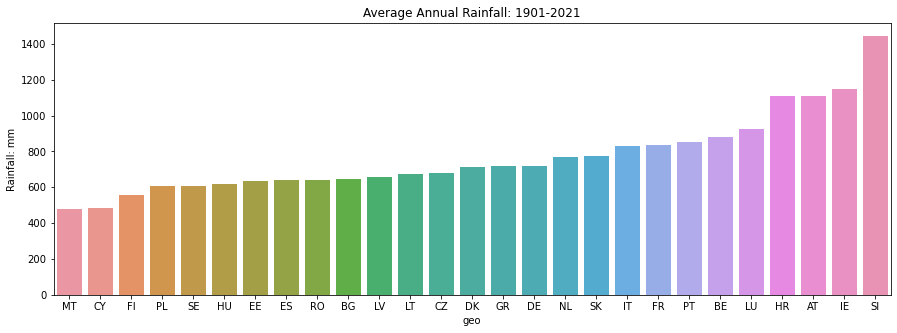

In [99]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.barplot(x = precipitation_df_long_mean.index, y = precipitation_df_long_mean.values)

plt.ylabel('Rainfall: mm')
plt.title('Average Annual Rainfall: 1901-2021')

In [100]:
precipitation_df_long.head()

,Year,geo,value
0,1901,AT,1052.84
1,1902,AT,1061.55
2,1903,AT,1201.34
3,1904,AT,1146.14
4,1905,AT,1127.85


In [101]:
# Now soil erosion

In [102]:
soil_erosion = df_list[6]

In [103]:
soil_erosion.head()

,Unnamed: 0,freq,levels,clc18,unit,geo\TIME_PERIOD,2000,2010,2016
0,112815,A,TOTAL,CLC2X23,T_HA,AT,5.3,5.0,4.9
1,112816,A,TOTAL,CLC2X23,T_HA,AT11,3.5,2.9,2.8
2,112817,A,TOTAL,CLC2X23,T_HA,AT111,4.3,3.3,3.1
3,112818,A,TOTAL,CLC2X23,T_HA,AT112,1.6,1.3,1.2
4,112819,A,TOTAL,CLC2X23,T_HA,AT113,6.0,5.1,4.9


In [104]:
soil_erosion_df = rename_filter_drop(soil_erosion, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [105]:
soil_erosion_df.head()

,levels,clc18,unit,geo,2000,2010,2016
0,TOTAL,CLC2X23,T_HA,AT,5.3,5.0,4.9
45,TOTAL,CLC2X23,T_HA,BE,2.1,1.7,1.7
101,TOTAL,CLC2X23,T_HA,BG,4.1,3.1,3.4
136,TOTAL,CLC2X23,T_HA,CY,4.3,3.6,3.7
139,TOTAL,CLC2X23,T_HA,CZ,3.3,2.7,2.7


In [109]:
# There are no missing values

null_share(soil_erosion_df)

levels    0.0
clc18     0.0
unit      0.0
geo       0.0
2000      0.0
2010      0.0
2016      0.0
dtype: float64

In [117]:
# Let's plot the data to get a feel for it
# First of all let's produce a long dataset

soil_erosion_df_long = soil_erosion_df.melt(id_vars = ['levels', 'clc18', 'unit', 'geo'], var_name = 'Year')


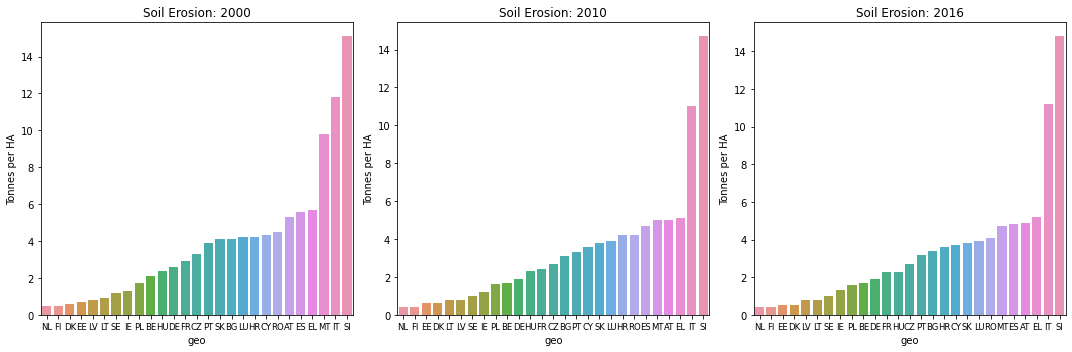

In [132]:
# I seemed to have used this for loop structure a few times, can I package this into a funtion?

fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i, year in enumerate(soil_erosion_df_long.Year.unique()):
    
    soil_erosion_graph_data = soil_erosion_df_long[soil_erosion_df_long.Year == year].sort_values(by = 'value')
    
    sns.barplot(data = soil_erosion_graph_data, x = 'geo', y = 'value', ax = ax[i])
    
    ax[i].set_title(f'Soil Erosion: {year}')
    
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize = 8.5)
    
    ax[i].set_ylabel('Tonnes per HA')
    
    
    
    
plt.tight_layout()



In [133]:
# From visual inspection, soil erosion is fairly consistent across countries and time
# Given this and that I only have data for 3 years, I'll average across the years
# and convert this to categorical data

In [134]:
soil_erosion_df_long.head()

,levels,clc18,unit,geo,Year,value
0,TOTAL,CLC2X23,T_HA,AT,2000,5.3
1,TOTAL,CLC2X23,T_HA,BE,2000,2.1
2,TOTAL,CLC2X23,T_HA,BG,2000,4.1
3,TOTAL,CLC2X23,T_HA,CY,2000,4.3
4,TOTAL,CLC2X23,T_HA,CZ,2000,3.3


In [159]:
soil_erosion_mean = soil_erosion_df_long.groupby(['clc18', 'unit', 'geo']).mean().reset_index()

In [160]:
# To apply my categorical_converter function, I need the data to be scaled so it's between 0 and 100
# I'll use the sklearn.preprocessing to do this

scaler = MinMaxScaler(feature_range = (0, 100))

soil_erosion_mean['value_scaled'] = scaler.fit_transform(soil_erosion_mean[['value']])

soil_erosion_mean['soil_erosion'] = soil_erosion_mean.value_scaled.apply(categorical_converter)


In [161]:
soil_erosion_mean.head()

,clc18,unit,geo,value,value_scaled,soil_erosion
0,CLC2X23,T_HA,AT,5.066667,32.101617,low
1,CLC2X23,T_HA,BE,1.833333,9.699769,very low
2,CLC2X23,T_HA,BG,3.533333,21.478060,low
3,CLC2X23,T_HA,CY,3.866667,23.787529,low
4,CLC2X23,T_HA,CZ,2.900000,17.090069,very low


In [163]:
soil_erosion_mean.groupby('soil_erosion').count()

,clc18,unit,geo,value,value_scaled
soil_erosion,,,,,
high,1,1,1,1,1
low,10,10,10,10,10
medium,1,1,1,1,1
very high,1,1,1,1,1
very low,14,14,14,14,14


In [164]:
# Next up is temperature

In [172]:
temperature = df_list[7]

In [173]:
temperature.head()

,Unnamed: 0,AT,BE,BG,CY,CZ,DE,DK,ES,EE,...,LV,MT,NL,PL,PT,RO,SK,SI,SE,Year
0,0,5.41,8.89,10.42,17.91,6.76,7.86,7.73,12.21,5.38,...,6.03,18.29,8.87,7.74,14.15,9.17,7.45,7.79,2.32,1901
1,1,5.34,8.52,9.78,17.46,6.23,7.37,6.45,12.42,3.00,...,3.96,18.40,8.30,6.31,14.27,8.27,6.57,7.78,0.29,1902
2,2,5.88,9.40,10.71,16.69,7.38,8.43,7.67,12.48,5.82,...,6.46,18.00,9.40,8.11,14.45,9.53,7.90,8.28,2.11,1903
3,3,6.22,9.38,10.22,17.06,7.51,8.50,7.54,12.86,4.14,...,4.92,18.29,9.30,7.47,14.78,8.91,7.71,8.65,1.28,1904
4,4,5.79,9.03,10.41,17.35,7.15,8.09,7.61,12.23,5.18,...,5.76,18.02,9.01,7.69,14.13,9.14,7.60,8.13,1.92,1905


In [174]:
temperature.rename(columns = eu_countries, inplace = True)
temperature.drop(columns = 'Unnamed: 0', inplace = True)

In [175]:
temperature.head()

,AT,BE,BG,CY,CZ,DE,DK,ES,EE,FI,...,LV,MT,NL,PL,PT,RO,SK,SI,SE,Year
0,5.41,8.89,10.42,17.91,6.76,7.86,7.73,12.21,5.38,1.50,...,6.03,18.29,8.87,7.74,14.15,9.17,7.45,7.79,2.32,1901
1,5.34,8.52,9.78,17.46,6.23,7.37,6.45,12.42,3.00,-1.11,...,3.96,18.40,8.30,6.31,14.27,8.27,6.57,7.78,0.29,1902
2,5.88,9.40,10.71,16.69,7.38,8.43,7.67,12.48,5.82,1.65,...,6.46,18.00,9.40,8.11,14.45,9.53,7.90,8.28,2.11,1903
3,6.22,9.38,10.22,17.06,7.51,8.50,7.54,12.86,4.14,0.29,...,4.92,18.29,9.30,7.47,14.78,8.91,7.71,8.65,1.28,1904
4,5.79,9.03,10.41,17.35,7.15,8.09,7.61,12.23,5.18,1.26,...,5.76,18.02,9.01,7.69,14.13,9.14,7.60,8.13,1.92,1905


In [176]:
temperature_df_long = temperature.melt(id_vars = 'Year', var_name = 'geo')

In [178]:
temperature_df_long.head()

,Year,geo,value
0,1901,AT,5.41
1,1902,AT,5.34
2,1903,AT,5.88
3,1904,AT,6.22
4,1905,AT,5.79


In [179]:
# There are no missing values

null_share(temperature_df_long)

Year     0.0
geo      0.0
value    0.0
dtype: float64

C:\Users\justi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Degrees Celsius')

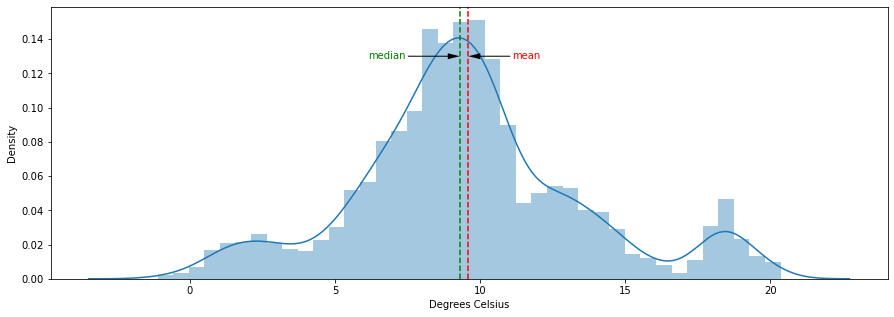

In [212]:
# The data is not exactly normal, it's skewed to the right as can clearly be seen by the mean being above the median
# I should reproduce this for the precipitation data

plt.subplots(figsize = (15, 5))

sns.distplot(temperature_df_long.value, kde = True)

mean_val = temperature_df_long.value.mean()
median_val = temperature_df_long.value.median()

plt.axvline(mean_val, linestyle = 'dashed', color = 'red')
plt.annotate('mean', xy = (mean_val, 0.13), xytext = (mean_val + 2, 0.13),
            arrowprops = dict(facecolor = 'black', edgecolor = 'none', width = 1, headwidth = 6),
            ha = 'center', va = 'center', color = 'red')

plt.axvline(median_val, linestyle = 'dashed', color = 'green')
plt.annotate('median', xy = (median_val, 0.13), xytext = (median_val - 2.5, 0.13),
            arrowprops = dict(facecolor = 'black', edgecolor = 'none', width = 1, headwidth = 6),
            ha = 'center', va = 'center', color = 'green')

plt.xlabel('Degrees Celsius')



In [213]:
# Let's get the median temperature for each country and graph it to get a feel for the data
# I'm using the median because the data is slightly skewed

temperature_med = temperature_df_long.groupby('geo').value.median().reset_index().sort_values(by = 'value')

Text(0.5, 1.0, 'Median Temperature: 1901-2021')

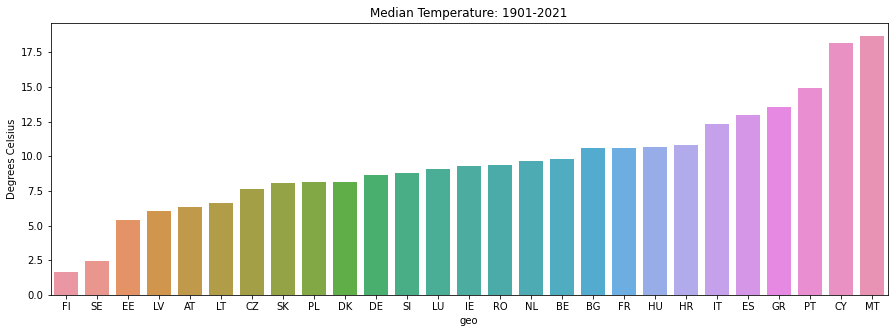

In [217]:
fig, ax = plt.subplots(figsize = (15, 5))

sns.barplot(data = temperature_med, x = 'geo', y = 'value')

plt.ylabel('Degrees Celsius')
plt.title('Median Temperature: 1901-2021')

In [220]:
temperature_med.head()

,geo,value
9,FI,1.62
24,SE,2.46
7,EE,5.43
18,LV,6.06
0,AT,6.32


In [223]:
eu_codes = {'AT': 'AUT', 'BE': 'BEL', 'BG': 'BGR', 'CY': 'CYP', 'CZ': 'CZE', 'DE': 'DEU', 'DK': 'DNK', 'EE': 'EST', 
            'ES': 'ESP', 'FI': 'FIN', 'FR': 'FRA', 'GR': 'GRC', 'HR': 'HRV', 'HU': 'HUN', 'IE': 'IRL', 'IT': 'ITA', 
            'LT': 'LTU', 'LU': 'LUX', 'LV': 'LVA', 'MT': 'MLT', 'NL': 'NLD', 'PL': 'POL', 'PT': 'PRT', 'RO': 'ROU', 
            'SE': 'SWE', 'SI': 'SVN', 'SK': 'SVK'}


temperature_med.geo.replace(eu_codes, inplace = True)

In [224]:
temperature_med.head()

,geo,value
9,FIN,1.62
24,SWE,2.46
7,EST,5.43
18,LVA,6.06
0,AUT,6.32


In [231]:
fig = px.choropleth(temperature_med, locations = 'geo', color = 'value', color_continuous_scale = px.colors.sequential.Plasma)
fig.update_layout(geo_scope = 'europe', title_text = 'Median Annual Temperate (Degrees Celsius): 1901-2021')
fig.show()

In [230]:
# Next up is tenure status

In [232]:
tenure_status = df_list[8]

In [234]:
tenure_status.head()

,Unnamed: 0,freq,tenure,age,sex,farmtype,agrarea,unit,geo\TIME_PERIOD,2013,2016
0,308784,A,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT,NaN,187410.0
1,308785,A,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT11,NaN,300.0
2,308786,A,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT12,NaN,2750.0
3,308787,A,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT13,NaN,0.0
4,308788,A,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT21,NaN,26600.0


In [235]:
tenure_status_df = rename_filter_drop(tenure_status, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [236]:
tenure_status_df.head()

,tenure,age,sex,farmtype,agrarea,unit,geo,2013,2016
0,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT,NaN,187410.0
10,CML,TOTAL,T,FT16_SO,TOTAL,HA,BE,NaN,0.0
22,CML,TOTAL,T,FT16_SO,TOTAL,HA,BG,NaN,696330.0
29,CML,TOTAL,T,FT16_SO,TOTAL,HA,CY,NaN,NaN
31,CML,TOTAL,T,FT16_SO,TOTAL,HA,CZ,NaN,0.0


In [243]:
# There are a lot of null values in 2013. As we just have 2 years of data, I'll again turn this into a categorical predictor
# based on the 2016 data unless there's missing data for 2016 that's available for 2013. I think this is reasonable seen as 
# tenure status is not something which would change significantly over short periods of time

null_share(tenure_status_df)

tenure       0.000000
age          0.000000
sex          0.000000
farmtype     0.000000
agrarea      0.000000
unit         0.000000
geo          0.000000
2013        25.000000
2016         0.925926
dtype: float64

In [244]:
grouped_null_counts(tenure_status_df, 'tenure')

,tenure,age,sex,farmtype,agrarea,unit,geo,2013,2016
tenure,,,,,,,,,
CML,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,3.703704
OWN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
RENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
SHR_OTH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [245]:
tenure_status_df['value'] = np.where(tenure_status_df['2016'].isnull(), tenure_status_df['2013'], tenure_status_df['2016'])

In [246]:
# It would appear from the below that 2013 wasn't able to fill any gaps in the 2016 data

null_share(tenure_status_df)

tenure       0.000000
age          0.000000
sex          0.000000
farmtype     0.000000
agrarea      0.000000
unit         0.000000
geo          0.000000
2013        25.000000
2016         0.925926
value        0.925926
dtype: float64

In [250]:
# I want total tenure and then I can define the different types as shares of the total

tenure_status_total = tenure_status_df.groupby('geo').value.sum().reset_index()

In [251]:
tenure_status_total.head()

,geo,value
0,AT,561710.0
1,BE,310760.0
2,BG,1023830.0
3,CY,23600.0
4,CZ,278220.0


In [264]:
# Now I want to join these total figures onto the the full dataset and calclate shares
# As the data are shares, NaN's can be replaced with 0

tenure_status_join = pd.merge(tenure_status_df, tenure_status_total, on = 'geo', how = 'left', suffixes = ('', '_total'))

tenure_status_join['share'] = tenure_status_join.value.div(tenure_status_join.value_total).mul(100)

tenure_status_join.fillna(0, inplace = True)

In [265]:
tenure_status_join.head()

,tenure,age,sex,farmtype,agrarea,unit,geo,2013,2016,value,value_total,share
0,CML,TOTAL,T,FT16_SO,TOTAL,HA,AT,0.0,187410.0,187410.0,561710.0,33.364191
1,CML,TOTAL,T,FT16_SO,TOTAL,HA,BE,0.0,0.0,0.0,310760.0,0.000000
2,CML,TOTAL,T,FT16_SO,TOTAL,HA,BG,0.0,696330.0,696330.0,1023830.0,68.012268
3,CML,TOTAL,T,FT16_SO,TOTAL,HA,CY,0.0,0.0,0.0,23600.0,0.000000
4,CML,TOTAL,T,FT16_SO,TOTAL,HA,CZ,0.0,0.0,0.0,278220.0,0.000000


In [271]:
len(tenure_status_join.tenure.unique())

4

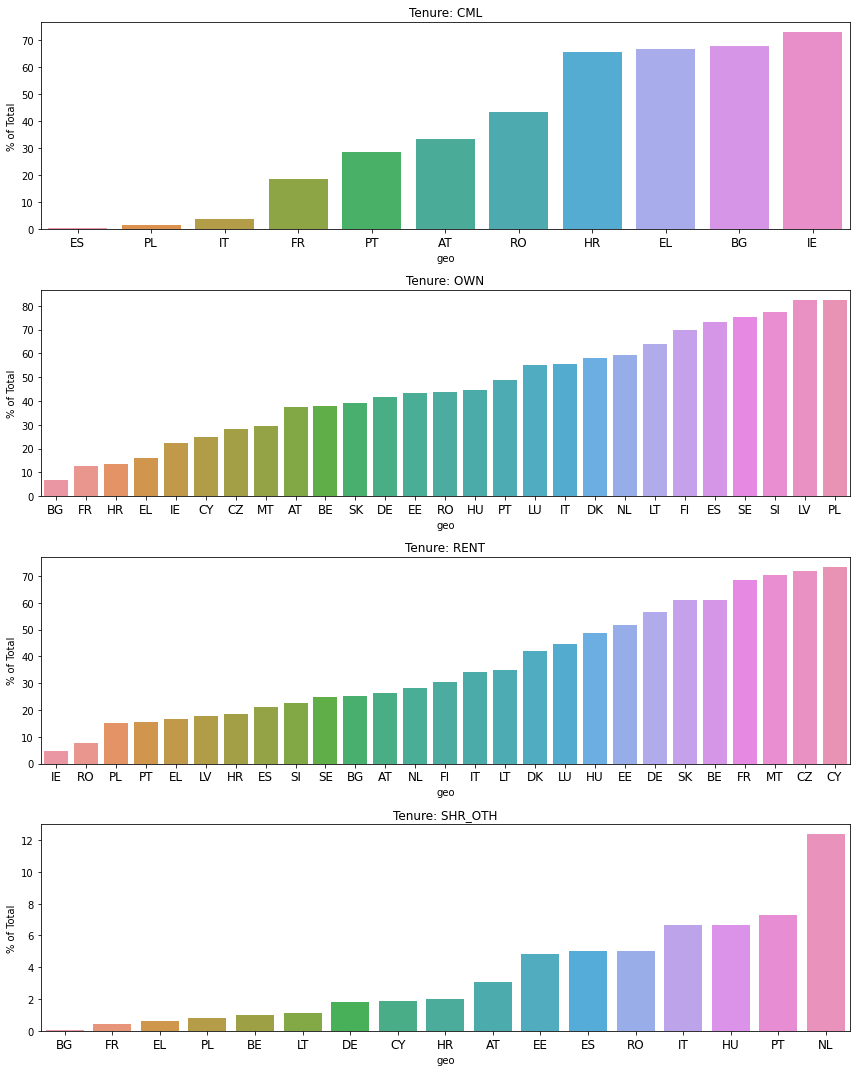

In [283]:
# I seemed to have used this for loop structure a few times, can I package this into a funtion?
# I should remove the filtering for non-zeroes to being outside the graphing code so it's still standard

fig, ax = plt.subplots(tenure_status_join.tenure.unique().size, 1, figsize = (12, 15))

for i, tenure in enumerate(tenure_status_join.tenure.unique()):
    
    tenure_graph_data = tenure_status_join[(tenure_status_join.tenure == tenure) & 
                                           (tenure_status_join.share != 0)].sort_values(by = 'share')
    
    sns.barplot(data = tenure_graph_data, x = 'geo', y = 'share', ax = ax[i])
    
    ax[i].set_title(f'Tenure: {tenure}')
    
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize = 12)
    
    ax[i].set_ylabel('% of Total')
    
    
    
    
plt.tight_layout()

In [267]:
tenure_status_join['tenure_status'] = tenure_status_join.share.apply(categorical_converter)

tenure_status_clean = tenure_status_join[['tenure', 'geo', 'tenure_status']]

tenure_status_clean.head()

,tenure,geo,tenure_status
0,CML,AT,low
1,CML,BE,very low
2,CML,BG,high
3,CML,CY,very low
4,CML,CZ,very low


In [281]:
# Now moving onto training

In [284]:
training = df_list[9]

In [285]:
training.head()

,Unnamed: 0,freq,training,age,sex,so_eur,agrarea,unit,geo\TIME_PERIOD,2013,2016
0,145156,A,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT,686840.0,691450.0
1,145157,A,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT11,36040.0,37840.0
2,145158,A,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT12,220350.0,243110.0
3,145159,A,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT13,1660.0,1400.0
4,145160,A,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT21,58210.0,47220.0


In [286]:
training_df = rename_filter_drop(training, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [287]:
training_df.head()

,training,age,sex,so_eur,agrarea,unit,geo,2013,2016
0,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT,686840.0,691450.0
10,BASIC,TOTAL,T,TOTAL,TOTAL,HA,BE,278590.0,428150.0
22,BASIC,TOTAL,T,TOTAL,TOTAL,HA,BG,135890.0,327040.0
29,BASIC,TOTAL,T,TOTAL,TOTAL,HA,CY,15720.0,57170.0
31,BASIC,TOTAL,T,TOTAL,TOTAL,HA,CZ,283850.0,262560.0


In [295]:
# There's no missing data in 2016, seen as I only have data for two years, I'll again turn this into a categorical variable
# just using the data from 2016

null_share(training_df)

training    0.000000
age         0.000000
sex         0.000000
so_eur      0.000000
agrarea     0.000000
unit        0.000000
geo         0.000000
2013        8.474576
2016        0.000000
dtype: float64

In [296]:
# There is a total figure so I don't need to calculate it, it adds up to the sub components to wihtin a bit of rounding

training_df.training.unique()

array(['BASIC', 'FULL', 'NAP', 'PRACT', 'TOTAL'], dtype=object)

In [300]:
training_df_total = training_df[training_df.training == 'TOTAL']

training_df_total.head()

,training,age,sex,so_eur,agrarea,unit,geo,2013,2016
1099,TOTAL,TOTAL,T,TOTAL,TOTAL,HA,AT,2726890.0,2669750.0
1109,TOTAL,TOTAL,T,TOTAL,TOTAL,HA,BE,1307900.0,1354250.0
1121,TOTAL,TOTAL,T,TOTAL,TOTAL,HA,BG,4650940.0,4491860.0
1128,TOTAL,TOTAL,T,TOTAL,TOTAL,HA,CY,109330.0,111930.0
1130,TOTAL,TOTAL,T,TOTAL,TOTAL,HA,CZ,3491470.0,3455410.0


In [308]:
training_df_join = pd.merge(training_df, training_df_total, on = ['age', 'sex', 'so_eur', 'agrarea', 'unit', 'geo'], 
                            how = 'left', suffixes = ('', '_total'))

training_df_join['share'] = training_df_join['2016'].div(training_df_join['2016_total']).mul(100)

training_df_join = training_df_join[training_df_join.training != 'TOTAL']

training_df_join.head()

,training,age,sex,so_eur,agrarea,unit,geo,2013,2016,training_total,2013_total,2016_total,share
0,BASIC,TOTAL,T,TOTAL,TOTAL,HA,AT,686840.0,691450.0,TOTAL,2726890.0,2669750.0,25.899429
1,BASIC,TOTAL,T,TOTAL,TOTAL,HA,BE,278590.0,428150.0,TOTAL,1307900.0,1354250.0,31.615285
2,BASIC,TOTAL,T,TOTAL,TOTAL,HA,BG,135890.0,327040.0,TOTAL,4650940.0,4491860.0,7.280726
3,BASIC,TOTAL,T,TOTAL,TOTAL,HA,CY,15720.0,57170.0,TOTAL,109330.0,111930.0,51.076566
4,BASIC,TOTAL,T,TOTAL,TOTAL,HA,CZ,283850.0,262560.0,TOTAL,3491470.0,3455410.0,7.598519


In [313]:
# Theses are shares so again I can replace NaN values with 0's

training_df_clean = training_df_join[['training', 'geo', 'share']].pivot(index = ['geo'], columns = 'training', 
                                                                         values = 'share').reset_index().fillna(0)

In [321]:
training_df_clean.head()

training,geo,BASIC,FULL,NAP,PRACT
0,AT,25.899429,37.823392,7.054968,29.221837
1,BE,31.615285,26.384346,0.000000,42.000369
2,BG,7.280726,28.832822,15.502041,48.384634
3,CY,51.076566,2.975074,0.000000,45.939426
4,CZ,7.598519,80.147942,0.000000,12.253249


In [319]:
training_df_clean.columns.dtype

dtype('O')

In [322]:
# Now I'll convert to a categorical variable with my categorical converter function
# I'm using a for loop here because I need to apply it to only numerical columns

for col in training_df_clean.select_dtypes(include = ['int', 'float']).columns:
    
    training_df_clean[col] = training_df_clean[col].apply(categorical_converter)



In [323]:
training_df_clean.head()

training,geo,BASIC,FULL,NAP,PRACT
0,AT,low,low,very low,low
1,BE,low,low,very low,medium
2,BG,very low,low,very low,medium
3,CY,medium,very low,very low,medium
4,CZ,very low,very high,very low,very low


In [ ]:
# Now to look at yields again


In [326]:
yields = df_list[10]

In [327]:
yields.head()

,Unnamed: 0,freq,crops,strucpro,geo\TIME_PERIOD,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,246,A,C0000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,...,5.85,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,247,A,C0000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,...,4.67,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,248,A,C0000,YI_HU_EU,CH,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,249,A,C0000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,NaN,...,1.69,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,250,A,C0000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,...,5.32,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
yields_df = rename_filter_drop(yields, 'geo\TIME_PERIOD', 'geo', 'geo', eu27_codes, ['Unnamed: 0', 'freq'])

In [329]:
yields_df.head()

,crops,strucpro,geo,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,C0000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.67,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.69,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.32,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C0000,YI_HU_EU,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.32,8.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
null_share(yields_df)

crops        0.000000
strucpro     0.000000
geo          0.000000
2000        81.428571
2001        81.339286
2002        81.160714
2003        81.160714
2004        77.410714
2005        77.500000
2006        77.500000
2007        77.500000
2008        76.607143
2009        76.607143
2010        33.571429
2011        34.017857
2012        34.642857
2013        35.178571
2014        31.785714
2015        21.785714
2016        20.357143
2017        23.035714
2018        20.535714
2019        21.607143
2020        18.392857
2021        20.803571
2022        35.982143
dtype: float64

In [334]:
grouped_null_counts(yields_df, 'crops')

,crops,strucpro,geo,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
crops,,,,,,,,,,,,,,,,,,,,,
C0000,0.0,0.0,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,45.000000,45.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
C1000,0.0,0.0,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,45.000000,40.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
C1100,0.0,0.0,0.0,73.076923,73.076923,73.076923,73.076923,65.384615,65.384615,65.384615,...,50.000000,46.153846,11.538462,7.692308,7.692308,3.846154,3.846154,0.000000,3.846154,15.384615
C1110,0.0,0.0,0.0,76.923077,76.923077,76.923077,76.923077,73.076923,73.076923,73.076923,...,0.000000,3.846154,3.846154,3.846154,0.000000,0.000000,0.000000,3.846154,3.846154,7.692308
C1111,0.0,0.0,0.0,76.923077,76.923077,76.923077,76.923077,73.076923,73.076923,73.076923,...,3.846154,3.846154,7.692308,0.000000,3.846154,3.846154,3.846154,3.846154,3.846154,7.692308
C1112,0.0,0.0,0.0,82.608696,82.608696,82.608696,82.608696,78.260870,78.260870,78.260870,...,56.521739,52.173913,17.391304,8.695652,17.391304,13.043478,13.043478,13.043478,13.043478,13.043478
C1120,0.0,0.0,0.0,80.000000,80.000000,80.000000,80.000000,73.333333,73.333333,73.333333,...,13.333333,13.333333,13.333333,6.666667,13.333333,13.333333,13.333333,6.666667,6.666667,6.666667
C1200,0.0,0.0,0.0,75.000000,75.000000,75.000000,75.000000,70.833333,70.833333,70.833333,...,0.000000,4.166667,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C1210,0.0,0.0,0.0,75.000000,75.000000,75.000000,75.000000,70.833333,70.833333,70.833333,...,54.166667,50.000000,12.500000,8.333333,12.500000,12.500000,8.333333,4.166667,8.333333,16.666667


In [335]:
potato_yields = yields_df[yields_df.crops == 'R1000']

In [336]:
potato_yields.head()

,crops,strucpro,geo,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1409,R1000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.59,35.10,26.34,36.16,28.42,29.38,31.34,36.52,34.11,32.00
1411,R1000,YI_HU_EU,BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.15,54.00,46.58,38.16,47.57,32.63,41.02,40.36,43.06,38.00
1412,R1000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.69,13.01,14.97,15.18,17.78,18.57,21.25,19.30,17.90,18.10
1414,R1000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,24.47,24.64,29.72,...,22.74,23.92,20.26,24.36,26.05,23.22,21.14,24.20,22.19,24.00
1415,R1000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.12,29.07,22.26,29.88,29.42,25.50,27.19,29.16,29.44,28.32


In [338]:
# There's mostly missing data before 2010 so I'll exclude this

null_share(potato_yields)

crops        0.000000
strucpro     0.000000
geo          0.000000
2000        73.076923
2001        73.076923
2002        73.076923
2003        73.076923
2004        65.384615
2005        65.384615
2006        65.384615
2007        65.384615
2008        65.384615
2009        65.384615
2010         7.692308
2011         0.000000
2012         0.000000
2013         3.846154
2014         3.846154
2015         0.000000
2016         3.846154
2017        15.384615
2018         3.846154
2019         7.692308
2020         0.000000
2021         3.846154
2022        11.538462
dtype: float64

In [339]:
potato_yields_long = potato_yields.melt(id_vars = ['crops', 'strucpro', 'geo'], var_name = 'Year')

In [340]:
potato_yields_long.head()

,crops,strucpro,geo,Year,value
0,R1000,YI_HU_EU,AT,2000,NaN
1,R1000,YI_HU_EU,BE,2000,NaN
2,R1000,YI_HU_EU,BG,2000,NaN
3,R1000,YI_HU_EU,CY,2000,NaN
4,R1000,YI_HU_EU,CZ,2000,NaN


In [341]:
grouped_null_counts(potato_yields_long, 'geo')

,crops,strucpro,geo,Year,value
geo,,,,,
AT,0.0,0.0,0.0,0.0,43.478261
BE,0.0,0.0,0.0,0.0,47.826087
BG,0.0,0.0,0.0,0.0,43.478261
CY,0.0,0.0,0.0,0.0,17.391304
CZ,0.0,0.0,0.0,0.0,43.478261
DE,0.0,0.0,0.0,0.0,43.478261
DK,0.0,0.0,0.0,0.0,43.478261
EE,0.0,0.0,0.0,0.0,17.391304
EL,0.0,0.0,0.0,0.0,0.000000


In [342]:
potato_yields_post_2010 = potato_yields_long[potato_yields_long.Year >= '2010']

In [343]:
potato_yields_post_2010.head()

,crops,strucpro,geo,Year,value
260,R1000,YI_HU_EU,AT,2010,30.57
261,R1000,YI_HU_EU,BE,2010,NaN
262,R1000,YI_HU_EU,BG,2010,18.19
263,R1000,YI_HU_EU,CY,2010,19.27
264,R1000,YI_HU_EU,CZ,2010,24.56


In [344]:
null_share(potato_yields_post_2010)

crops       0.000000
strucpro    0.000000
geo         0.000000
Year        0.000000
value       4.733728
dtype: float64

In [346]:
grouped_null_counts(potato_yields_post_2010, 'geo')

,crops,strucpro,geo,Year,value
geo,,,,,
AT,0.0,0.0,0.0,0.0,0.000000
BE,0.0,0.0,0.0,0.0,7.692308
BG,0.0,0.0,0.0,0.0,0.000000
CY,0.0,0.0,0.0,0.0,0.000000
CZ,0.0,0.0,0.0,0.0,0.000000
DE,0.0,0.0,0.0,0.0,0.000000
DK,0.0,0.0,0.0,0.0,0.000000
EE,0.0,0.0,0.0,0.0,0.000000
EL,0.0,0.0,0.0,0.0,0.000000


In [347]:
grouped_null_counts(potato_yields_post_2010, 'Year')

,crops,strucpro,geo,Year,value
Year,,,,,
2010,0.0,0.0,0.0,0.0,7.692308
2011,0.0,0.0,0.0,0.0,0.000000
2012,0.0,0.0,0.0,0.0,0.000000
2013,0.0,0.0,0.0,0.0,3.846154
2014,0.0,0.0,0.0,0.0,3.846154
2015,0.0,0.0,0.0,0.0,0.000000
2016,0.0,0.0,0.0,0.0,3.846154
2017,0.0,0.0,0.0,0.0,15.384615
2018,0.0,0.0,0.0,0.0,3.846154


<AxesSubplot:xlabel='Year', ylabel='value'>

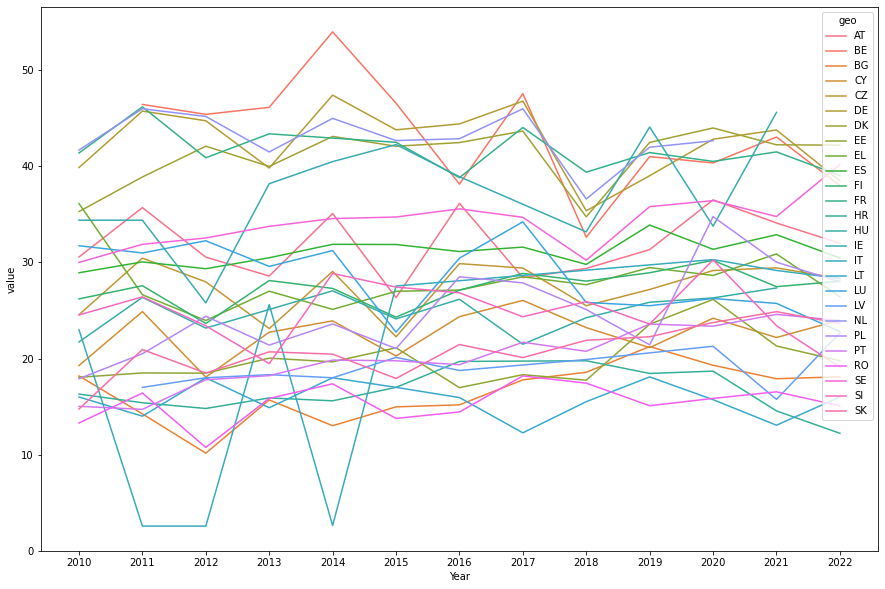

In [350]:
plt.subplots(figsize = (15, 10))

sns.lineplot(data = potato_yields_post_2010, x = 'Year', y = 'value', hue = 'geo')

In [352]:
potato_yields_clean = potato_yields_post_2010.fillna(method = 'ffill')

In [353]:
null_share(potato_yields_clean)

crops       0.0
strucpro    0.0
geo         0.0
Year        0.0
value       0.0
dtype: float64

C:\Users\justi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Potato Yields')

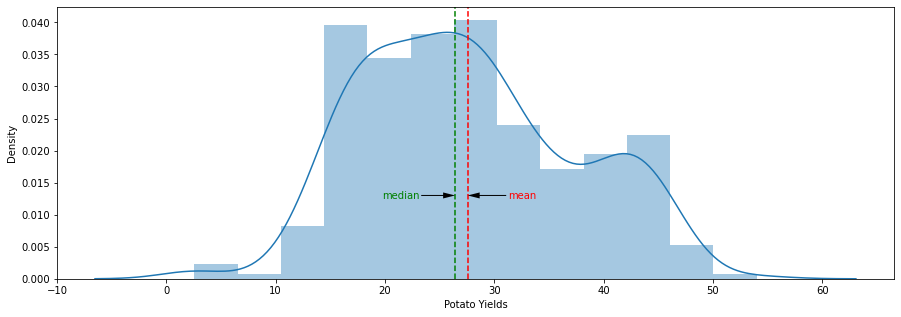

In [360]:
plt.subplots(figsize = (15, 5))

sns.distplot(potato_yields_clean.value, kde = True)

mean_val = potato_yields_clean.value.mean()
median_val = potato_yields_clean.value.median()

plt.axvline(mean_val, linestyle = 'dashed', color = 'red')
plt.annotate('mean', xy = (mean_val, 0.013), xytext = (mean_val + 5, 0.013),
            arrowprops = dict(facecolor = 'black', edgecolor = 'none', width = 1, headwidth = 6),
            ha = 'center', va = 'center', color = 'red')

plt.axvline(median_val, linestyle = 'dashed', color = 'green')
plt.annotate('median', xy = (median_val, 0.013), xytext = (median_val - 5, 0.013),
            arrowprops = dict(facecolor = 'black', edgecolor = 'none', width = 1, headwidth = 6),
            ha = 'center', va = 'center', color = 'green')

plt.xlabel('Potato Yields')

In [361]:
# I'll use the median seen as the data is slightly skewed

potato_yields_med = potato_yields_clean.groupby('geo').median().reset_index()

In [362]:
potato_yields_med.geo.replace(eu_codes, inplace = True)

In [363]:
fig = px.choropleth(potato_yields_med, locations = 'geo', color = 'value', color_continuous_scale = px.colors.sequential.Plasma)
fig.update_layout(geo_scope = 'europe', title_text = 'Potato Crop Yields Median: 2010-2022')
fig.show()